In [357]:
import pandas as pd
import numpy as np

### Using the final data file (I checked if data is compatible beforehand)

In [358]:
df = pd.read_csv('new_results_survey.csv')

df.drop(columns=df.iloc[:,1:6].columns.tolist(), axis=1, inplace=True)

### Removing unnecessary columns

In [359]:
# checking if all consents were signed
if (df.iloc[:, 1:11] == 'no').any(axis=1).any():
    print("Not all participants signed the consents.")
else:
    print("All participants signed the consents and fulfill all the requirements.")
    
    
df.drop(columns=df.iloc[:,1:11].columns.tolist(), axis=1, inplace=True)
df.drop(columns=df.iloc[:,2:8].columns.tolist(), axis=1, inplace=True)

df.drop(columns=df.columns[-1], inplace=True)

All participants signed the consents and fulfill all the requirements.


### Converting text variables into numerical ones & adjusting the scales (some columns still need to be handled)

In [360]:
df.loc[df.iloc[:, 1] == 'Cognitive Science Bachelor program at the Osnabrück University', df.columns[1]] = int(0) #Bachelor
df.loc[df.iloc[:, 1] == 'Cognitive Science Master program at the Osnabrück University', df.columns[1]] = int(1) #Master

def into_liekert(col_index):
    df.loc[df.iloc[:, col_index] == 'Strongly disagree (1)', df.columns[col_index]] = int(1)
    df.loc[df.iloc[:, col_index] == 'Disagree (2)', df.columns[col_index]] = int(2)
    df.loc[df.iloc[:, col_index] == 'Somewhat disagree (3)', df.columns[col_index]] = int(3)
    df.loc[df.iloc[:, col_index] == 'Neutral (4)', df.columns[col_index]] = int(4)
    df.loc[df.iloc[:, col_index] == 'Somewhat agree (5)', df.columns[col_index]] = int(5)
    df.loc[df.iloc[:, col_index] == 'Agree (6)', df.columns[col_index]] = int(6)
    df.loc[df.iloc[:, col_index] == 'Strongly agree (7)', df.columns[col_index]] = int(7)
    df.loc[df.iloc[:, col_index] == 'Not Applicable (8)', df.columns[col_index]] = np.nan

    return df

for indices in range(2,6):
    into_liekert(indices)   

def into_liekert_parentheses(col_index):
    column = df.iloc[:, col_index]

    # Check if the column contains strings
    if pd.api.types.is_string_dtype(column):
        for index, value in column.items():
            if value.startswith('(1)'):
                df.loc[index, df.columns[col_index]] = 1
            elif value.startswith('(2)'):
                df.loc[index, df.columns[col_index]] = 2
            elif value.startswith('(3)'):
                df.loc[index, df.columns[col_index]] = 3
            elif value.startswith('(4)'):
                df.loc[index, df.columns[col_index]] = 4
            elif value.startswith('(5)'):
                df.loc[index, df.columns[col_index]] = 5
            elif value.startswith('(6)'):
                df.loc[index, df.columns[col_index]] = 6
            elif value.startswith('(7)'):
                df.loc[index, df.columns[col_index]] = 7

    return df

def into_liekert_parentheses_reverse(col_index):
    column = df.iloc[:, col_index]

    # Check if the column contains strings
    if pd.api.types.is_string_dtype(column):
        for index, value in column.items():
            if value.startswith('(1)'):
                df.loc[index, df.columns[col_index]] = 7
            elif value.startswith('(2)'):
                df.loc[index, df.columns[col_index]] = 6
            elif value.startswith('(3)'):
                df.loc[index, df.columns[col_index]] = 5
            elif value.startswith('(4)'):
                df.loc[index, df.columns[col_index]] = 4
            elif value.startswith('(5)'):
                df.loc[index, df.columns[col_index]] = 3
            elif value.startswith('(6)'):
                df.loc[index, df.columns[col_index]] = 2
            elif value.startswith('(7)'):
                df.loc[index, df.columns[col_index]] = 1

    return df

into_liekert_parentheses(6)

def into_liekert_single_parenthesis(col_index):
    column = df.iloc[:, col_index]

    # Check if the column contains strings
    if pd.api.types.is_string_dtype(column):
        for index, value in column.items():
            if value.startswith('1)'):
                df.loc[index, df.columns[col_index]] = 1
            elif value.startswith('2)'):
                df.loc[index, df.columns[col_index]] = 2
            elif value.startswith('3)'):
                df.loc[index, df.columns[col_index]] = 3
            elif value.startswith('4)'):
                df.loc[index, df.columns[col_index]] = 4
            elif value.startswith('5)'):
                df.loc[index, df.columns[col_index]] = 5
            elif value.startswith('6)'):
                df.loc[index, df.columns[col_index]] = 6
            elif value.startswith('7)'):
                df.loc[index, df.columns[col_index]] = 7
            elif value.startswith('8)'):
                df.loc[index, df.columns[col_index]] = np.nan

    return df


into_liekert_single_parenthesis(7)

for indices in range(8, 16):
    into_liekert(indices)

def new_liekert_scale(col_index):
    df.loc[df.iloc[:, col_index] == 'Strongly disagree (1)', df.columns[col_index]] = int(1)
    df.loc[df.iloc[:, col_index] == 'Disagree (2)', df.columns[col_index]] = int(2)
    df.loc[df.iloc[:, col_index] == 'Somewhat disagree (3)', df.columns[col_index]] = int(3)
    df.loc[df.iloc[:, col_index] == 'Neutral (4)', df.columns[col_index]] = int(4)
    df.loc[df.iloc[:, col_index] == 'Somewhat agree (8)', df.columns[col_index]] = int(5)
    df.loc[df.iloc[:, col_index] == 'Agree (5)', df.columns[col_index]] = int(6)
    df.loc[df.iloc[:, col_index] == 'Strongly agree (6)', df.columns[col_index]] = int(7)

    return df


for indices in range(16, 22):
    new_liekert_scale(indices)

for indices in range(22, 27):
    into_liekert_parentheses(indices)

into_liekert_parentheses_reverse(27)
into_liekert_parentheses(28)
into_liekert_parentheses_reverse(29)

def liekert_reverse(col_index):
    df.loc[df.iloc[:, col_index] == 'Strongly Agree (1)', df.columns[col_index]] = int(7)
    df.loc[df.iloc[:, col_index] == 'Agree (2)', df.columns[col_index]] = int(6)
    df.loc[df.iloc[:, col_index] == 'Somewhat Agree (3)', df.columns[col_index]] = int(5)
    df.loc[df.iloc[:, col_index] == 'Neutral (4)', df.columns[col_index]] = int(4)
    df.loc[df.iloc[:, col_index] == 'Somewhat Disagree (5)', df.columns[col_index]] = int(3)
    df.loc[df.iloc[:, col_index] == 'Disagree (6)', df.columns[col_index]] = int(2)
    df.loc[df.iloc[:, col_index] == 'Strongly Disagree (7)', df.columns[col_index]] = int(1)
    df.loc[df.iloc[:, col_index] == 'Not Applicable (8)', df.columns[col_index]] = np.nan

    return df

for indices in range(30, 39):
    liekert_reverse(indices)

into_liekert_parentheses_reverse(39)

for indices in range(40, 49):
    liekert_reverse(indices)

into_liekert_parentheses_reverse(49)

def yes_vs_no(col_index):
    df.loc[df.iloc[:, col_index] == 'No', df.columns[col_index]] = int(0)
    df.loc[df.iloc[:, col_index] == 'Yes', df.columns[col_index]] = int(1)

    return df

for indices in range(49, 76):
    yes_vs_no(indices)

for indices in range(76, 86):
    yes_vs_no(indices)

def frequency_scale(col_index):
    df.loc[df.iloc[:, col_index] == '(1) Everyday', df.columns[col_index]] = int(5)
    df.loc[df.iloc[:, col_index] == '(2) Most of the days', df.columns[col_index]] = int(4)
    df.loc[df.iloc[:, col_index] == '(3) Half of the days or slightly more', df.columns[col_index]] = int(3)
    df.loc[df.iloc[:, col_index] == '(4) Some of the days', df.columns[col_index]] = int(2)
    df.loc[df.iloc[:, col_index] == '(5) Never', df.columns[col_index]] = int(1)

    return df

for indices in range(87, 97):
    frequency_scale(indices)

def frequency_scale2(col_index):
    df.loc[df.iloc[:, col_index] == 'At no time (0)', df.columns[col_index]] = int(0)
    df.loc[df.iloc[:, col_index] == 'Some of the time (1)', df.columns[col_index]] = int(1)
    df.loc[df.iloc[:, col_index] == 'Less than half of the time (2)', df.columns[col_index]] = int(2)
    df.loc[df.iloc[:, col_index] == 'More than half of the time (3)', df.columns[col_index]] = int(3)
    df.loc[df.iloc[:, col_index] == 'Most of the time (4)', df.columns[col_index]] = int(4)
    df.loc[df.iloc[:, col_index] == 'All of the time (5)', df.columns[col_index]] = int(5)

    return df

for indices in range(97, 101):
    frequency_scale2(indices)

for indices in range(105, 125):
    yes_vs_no(indices)


Column 100 (WHO5[SQ004]. Over the last two weeks [I woke up feeling fresh and rested]): [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70]
Column 101 (WHO5[SQ005]. Over the last two weeks [My daily life has been filled with things that interest me]): [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70]
Column 102 (GenderId. What best describes your gender?): [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50

In [361]:
df.loc[df.iloc[:, 39] == '(7) Much worse', df.columns[39]] = int(1)
df.loc[df.iloc[:, 39] == '(6) Worse', df.columns[39]] = int(2)
df.loc[df.iloc[:, 39] == '(5) Slightly worse', df.columns[39]] = int(3)
df.loc[df.iloc[:, 39] == '(4) Unchanged', df.columns[39]] = int(4)
df.loc[df.iloc[:, 39] == '(3) Slightly better', df.columns[39]] = int(5)
df.loc[df.iloc[:, 39] == '(2) Better', df.columns[39]] = int(6)
df.loc[df.iloc[:, 39] == '(1) Much better', df.columns[39]] = int(7)


In [362]:
frequency_scale2(101)

yes_vs_no(85)
yes_vs_no(103)

df.loc[df.iloc[:, 102] == 'Male', df.columns[102]] = int(0)
df.loc[df.iloc[:, 102] == 'Female', df.columns[102]] = int(2)
df.loc[df.iloc[:, 102] == 'Diverse/Non-binary', df.columns[102]] = int(1)
df.loc[df.iloc[:, 102] == 'Prefer not to say', df.columns[102]] = np.nan

df.loc[df.iloc[:, 105] == 'Less than 10,000 €', df.columns[105]] = int(0)
df.loc[df.iloc[:, 105] == '10,000 - 12,500 €', df.columns[105]] = int(1)
df.loc[df.iloc[:, 105] == '12,500 - 15,000 €', df.columns[105]] = int(2)
df.loc[df.iloc[:, 105] == '15,000 - 17,500 €', df.columns[105]] = int(3)
df.loc[df.iloc[:, 105] == '17,500 - 20,000 €', df.columns[105]] = int(4)
df.loc[df.iloc[:, 105] == '20,000 - 22,500 €', df.columns[105]] = int(5)
df.loc[df.iloc[:, 105] == '22,500 - 25,000 €', df.columns[105]] = int(6)
df.loc[df.iloc[:, 105] == '25,000 - 27,500 €', df.columns[105]] = int(7)
df.loc[df.iloc[:, 105] == '27,500 - 30,000 €', df.columns[105]] = int(8)
df.loc[df.iloc[:, 105] == 'More than 30,000 €', df.columns[105]] = int(9)
df.loc[df.iloc[:, 105] == 'I prefer not to answer.', df.columns[105]] = np.nan

df.loc[df.iloc[:, 125] == 'Some Primary', df.columns[125]] = int(0)
df.loc[df.iloc[:, 125] == 'Completed Primary School', df.columns[125]] = int(1)
df.loc[df.iloc[:, 125] == 'Some Secondary', df.columns[125]] = int(2)
df.loc[df.iloc[:, 125] == 'Completed Secondary School', df.columns[125]] = int(3)
df.loc[df.iloc[:, 125] == 'Vocational or Similar', df.columns[125]] = int(4)
df.loc[df.iloc[:, 125] == 'Some University but no degree', df.columns[125]] = int(5)
df.loc[df.iloc[:, 125] == 'University Bachelors Degree', df.columns[125]] = int(6)
df.loc[df.iloc[:, 125] == 'Graduate or professional degree (MA, MS, MBA, PhD, ID, MD, DDS)', df.columns[125]] = int(7)


# Perform quantile binning over the year of birth column
num_bins = 7
df['Age. Which year were you born in? '] = pd.qcut(df['Age. Which year were you born in? '], q=num_bins, labels=False, precision=3, duplicates='drop')

df.drop(columns='Activity[other]. Which of these options best describe(s) your professional status? [Other]', inplace=True)


### Dropping useless columns

In [363]:
# I'd also drop the following two columns since they're not very informative
# but they sure are annoying to process:
df.drop(columns='ActPri[other]. In the hour before the study, I have pursued the following activities  (choose all applicable) [Other]', inplace=True)
df.drop(columns='peoplePri[other]. In the past hour before this survey, I have interacted with...  (choose all applicable) [Other]', inplace=True)

# And also response ID since we're not interested in correlations between participants
df.drop(columns='id. Response ID', inplace=True)

df.to_excel('cleaned_data.xlsx', index=False)

### Saving columns of the final df

In [364]:
col_list = df.columns

column_names = list(df.columns)
var_list = pd.DataFrame(data=column_names)
var_list.to_excel('question_list.xlsx', header=False)

df_copy = df.copy()
df_copy2 = df.copy()
df.columns = range(len(column_names))


### Data normalization & imputation

In [365]:
############# Normalization
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.impute import SimpleImputer

# Min-Max Scaling for the entire DataFrame
minmax_scaler = MinMaxScaler()
df[:] = minmax_scaler.fit_transform(df)
df_copy[:] = minmax_scaler.fit_transform(df_copy)

# Z-score normalization for the entire DataFrame
zscore_scaler = StandardScaler()
df[:] = zscore_scaler.fit_transform(df)
df_copy[:] = zscore_scaler.fit_transform(df_copy)

# Imputation of NaN values
imputer = SimpleImputer(strategy='mean')  # You can choose 'median' or 'constant' as well

# Apply imputation to the entire DataFrame
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
df_copy_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df_copy.columns)

df_imputed.to_excel('imputed_data.xlsx', index=False)


In [366]:
from scipy.stats import f_oneway
from scipy import stats

unique = df_imputed.iloc[:, 102].unique()

options = []

for i in unique:
    option_i = df_imputed[df_imputed.iloc[:, 102] == i]
    options.append(np.array(option_i).flatten())

# Perform ANOVA test
f_stat, p_value = f_oneway(options[0], options[1], options[2], options[3], options[4], options[5], options[6])

# Check the p-value to determine significance
if p_value < 0.05:
    print(f"There is a significant difference among students having different incomes (p={p_value}).")
else:
    print(f"There is no significant difference among students having different incomes (p={p_value}).")


##### MEN AND WOMEN
unique = df_imputed.iloc[:, 99].unique()

options2 = []

for i in unique:
    option_i = df_imputed[df_imputed.iloc[:, 99] == i]
    options2.append(np.array(option_i).flatten())

# unique[0] = 'non-binary'
# unique[1] = 'female'
# unique[2] = 'male'

binary = np.concatenate([options2[1], options2[2]])

t_stat, p_value = ttest_ind(options2[1], options2[2], equal_var=False)
t_stat2, p_value2 = ttest_ind(binary, options[0], equal_var=False)

# Check the p-value to determine significance
if p_value < 0.05:
    print(f"There is a significant difference between men and women (p={p_value}).")
else:
    print(f"There is no significant difference between men and women (p={p_value}).")

# Check the p-value to determine significance
if p_value2 < 0.05:
    print(f"There is a significant difference between binary and non-binary people (p={p_value2}).")
else:
    print(f"There is no significant difference between binary and non-binary people (p={p_value2}).")

##### Master vs Bachelor

unique = df_imputed.iloc[:, 0].unique()

options3 = []

for i in unique:
    option_i = df_imputed[df_imputed.iloc[:, 0] == i]
    options3.append(np.array(option_i).flatten())

t_stat3, p_value3 = ttest_ind(options3[0], options3[1], equal_var=False)

# Check the p-value to determine significance
if p_value3 < 0.05:
    print(f"There is a significant difference between Bachelor and Master students (p={p_value3}).")
else:
    print(f"There is no significant difference between Bachelor and Master students (p={p_value3}).")


#### GENDER IDENTITY
    
unique = df_imputed.iloc[:, 100].unique()

options4 = []

for i in unique:
    option_i = df_imputed[df_imputed.iloc[:, 100] == i]
    options4.append(np.array(option_i).flatten())

t_stat3, p_value3 = ttest_ind(options4[0], options4[1], equal_var=False)

# Check the p-value to determine significance
if p_value3 < 0.05:
    print(f"There is a significant difference between students identifying with their sex and those who do not (p={p_value3}).")
else:
    print(f"There is no significant difference between students identifying with their sex and those who do not (p={p_value3}).")


#### Any diagnoses
    
# Columns to merge (108 to 118)
columns_to_merge = df_copy2.iloc[:, 108:119]

# Create a new column with 1 if at least one "1" is present in the row, else 0
df_copy2['Merged_Column'] = columns_to_merge.apply(lambda row: 1 if 1 in row.values else 0, axis=1)

# Filter rows with Merged_Column equal to 0
option_zero = np.array(df_copy2[df_copy2['Merged_Column'] == 0].fillna(0)).flatten()

# Filter rows with Merged_Column equal to 1
option_one = np.array(df_copy2[df_copy2['Merged_Column'] == 1].fillna(0)).flatten()

t_stat3, p_value3 = ttest_ind(option_zero, option_one, equal_var=False)

# Check the p-value to determine significance
if p_value3 < 0.05:
    print(f"There is a significant difference between students with psychiatric diagnoses and those without them (p={p_value3}).")
else:
    print(f"There is no significant difference between students  with psychiatric diagnoses and those without them  (p={p_value3}).")


There is no significant difference among students having different incomes (p=0.8087518267526157).
There is a significant difference between men and women (p=0.0006855698121174404).
There is no significant difference between binary and non-binary people (p=0.8352547910906266).
There is a significant difference between Bachelor and Master students (p=0.005343464150098657).
There is a significant difference between students identifying with their sex and those who do not (p=0.017567944514030435).
There is no significant difference between students  with psychiatric diagnoses and those without them  (p=0.16264130846850416).


### Specific hypotheses testing

In [367]:
from scipy.stats import pearsonr

compP = df_imputed.iloc[:, 48]
compN = df_imputed.iloc[:, 38]

corr, p = pearsonr(compP, compN)

# Check the p-value to determine significance
if p < 0.05:
    print(f"There is a significant correlation for compP and compN: {corr} (p={p}).")
else:
    print(f"There is no significant correlation for compP and compN: {corr} (p={p}).")

############################
print('\n For items between indices 29 and 37, and 39 and 47:', '\n')

SoCQ1N_1 = df_imputed.iloc[:, 29]
SoCQ1P_1 = df_imputed.iloc[:, 39]

corr, p = pearsonr(SoCQ1N_1, SoCQ1P_1)

# Check the p-value to determine significance
if p < 0.05:
    print(f"There is a significant correlation for SoCQ1P_1 and SoCQ1N_1: {corr} (p={p}).")
else:
    print(f"There is no significant correlation for SoCQ1P_1 and SoCQ1N_1: {corr} (p={p}).")

#################################
############################

SoCQ1N_2 = df_imputed.iloc[:, 30]
SoCQ1P_2 = df_imputed.iloc[:, 40]

corr, p = pearsonr(SoCQ1N_2, SoCQ1P_2)

# Check the p-value to determine significance
if p < 0.05:
    print(f"There is a significant correlation for SoCQ1P_2 and SoCQ1N_2: {corr} (p={p}).")
else:
    print(f"There is no significant correlation for SoCQ1P_2 and SoCQ1N_2: {corr} (p={p}).")

############################

SoCQ1N_3 = df_imputed.iloc[:, 31]
SoCQ1P_3 = df_imputed.iloc[:, 41]

corr, p = pearsonr(SoCQ1N_3, SoCQ1P_3)

# Check the p-value to determine significance
if p < 0.05:
    print(f"There is a significant correlation for SoCQ1N_3 and SoCQ1p_3: {corr} (p={p}).")
else:
    print(f"There is no significant correlation for SoCQ1N_3 and SoCQ1p_3: {corr} (p={p}).")

############################

SoCQ1N_4 = df_imputed.iloc[:, 32]
SoCQ1P_4 = df_imputed.iloc[:, 42]

corr, p = pearsonr(SoCQ1N_4, SoCQ1P_4)

# Check the p-value to determine significance
if p < 0.05:
    print(f"There is a significant correlation for SoCQ1N_4 and SoCQ1P_4: {corr} (p={p}).")
else:
    print(f"There is no significant correlation for SoCQ1N_4 and SoCQ1P_4: {corr} (p={p}).")

############################

SoCQ1N_5 = df_imputed.iloc[:, 33]
SoCQ1P_5 = df_imputed.iloc[:, 43]

corr, p = pearsonr(SoCQ1N_5, SoCQ1P_5)

# Check the p-value to determine significance
if p < 0.05:
    print(f"There is a significant correlation for SoCQ1N_5 and SoCQ1P_5: {corr} (p={p}).")
else:
    print(f"There is no significant correlation for SoCQ1N_5 and SoCQ1P_5: {corr} (p={p}).")

############################

SoCQ1N_6 = df_imputed.iloc[:, 34]
SoCQ1P_6 = df_imputed.iloc[:, 44]

corr, p = pearsonr(SoCQ1N_6, SoCQ1P_6)

# Check the p-value to determine significance
if p < 0.05:
    print(f"There is a significant correlation for SoCQ1N_6 and SoCQ1P_6: {corr} (p={p}).")
else:
    print(f"There is no significant correlation for SoCQ1N_6 and SoCQ1P_6: {corr} (p={p}).")

############################

SoCQ1N_7 = df_imputed.iloc[:, 35]
SoCQ1P_7 = df_imputed.iloc[:, 45]

corr, p = pearsonr(SoCQ1N_7, SoCQ1P_7)

# Check the p-value to determine significance
if p < 0.05:
    print(f"There is a significant correlation for SoCQ1N_7 and SoCQ1P_7: {corr} (p={p}).")
else:
    print(f"There is no significant correlation for SoCQ1N_7 and SoCQ1P_7: {corr} (p={p}).")

############################

SoCQ1N_8 = df_imputed.iloc[:, 36]
SoCQ1P_8 = df_imputed.iloc[:, 46]

corr, p = pearsonr(SoCQ1P_8, SoCQ1N_8)

# Check the p-value to determine significance
if p < 0.05:
    print(f"There is a significant correlation for SoCQ1N_8 and SoCQ1P_8: {corr} (p={p}).")
else:
    print(f"There is no significant correlation for SoCQ1N_8 and SoCQ1P_8: {corr} (p={p}).")

############################

SoCQ1N_9 = df_imputed.iloc[:, 37]
SoCQ1P_9 = df_imputed.iloc[:, 47]

corr, p = pearsonr(SoCQ1P_9, SoCQ1N_9)

# Check the p-value to determine significance
if p < 0.05:
    print(f"There is a significant correlation for SoCQ1N_9 and SoCQ1P_9: {corr} (p={p}).")
else:
    print(f"There is no significant correlation for SoCQ1N_9 and SoCQ1P_9: {corr} (p={p}).")

There is no significant correlation for compP and compN: -0.03316042490709621 (p=0.783676897800356).

 For items between indices 29 and 37, and 39 and 47: 

There is a significant correlation for SoCQ1P_1 and SoCQ1N_1: -0.7380421895001509 (p=2.0842447341334848e-13).
There is no significant correlation for SoCQ1P_2 and SoCQ1N_2: 0.07319714701616639 (p=0.5440917852329872).
There is no significant correlation for SoCQ1N_3 and SoCQ1p_3: 0.04263889881789935 (p=0.7240396090532458).
There is a significant correlation for SoCQ1N_4 and SoCQ1P_4: -0.48577443276401105 (p=1.7526769458787656e-05).
There is no significant correlation for SoCQ1N_5 and SoCQ1P_5: -0.00341858103759588 (p=0.977427464889442).
There is a significant correlation for SoCQ1N_6 and SoCQ1P_6: -0.43969972505247146 (p=0.00012475647107119646).
There is a significant correlation for SoCQ1N_7 and SoCQ1P_7: -0.6510943241483341 (p=7.868596720442889e-10).
There is a significant correlation for SoCQ1N_8 and SoCQ1P_8: -0.6435945040854129

### Correlation matrix

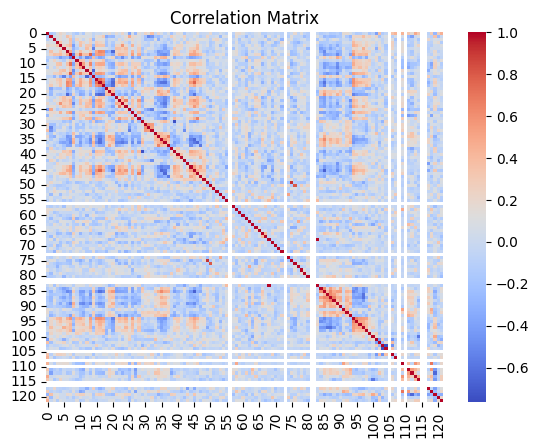

In [368]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import t

# Compute correlation matrix
correlation_matrix = df_imputed.corr(method="pearson")
correlations = np.array(correlation_matrix)

# Visualize the correlation matrix
#plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

### Correlation matrix for strong correlations

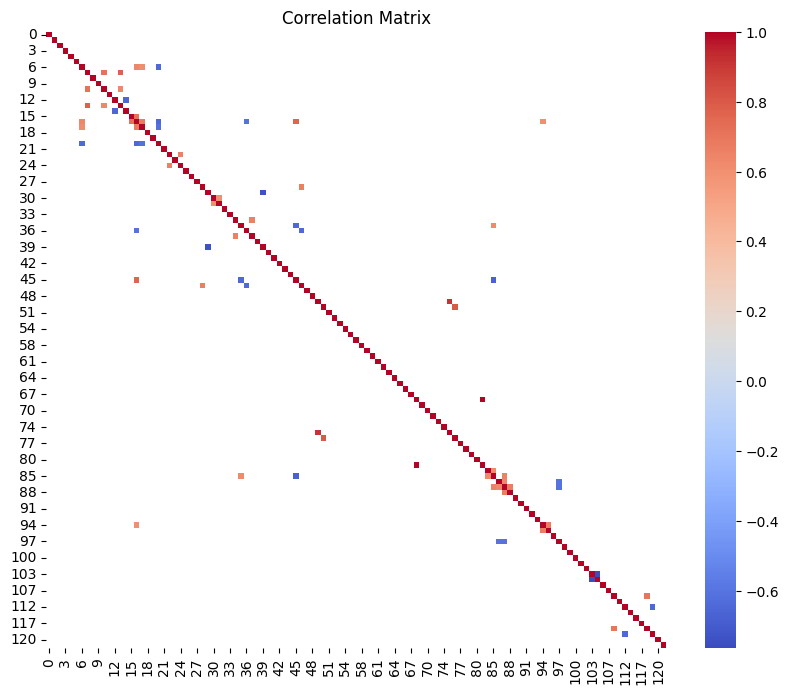

In [369]:
# Set the threshold
threshold = 0.6

# Filter the correlation matrix based on the threshold
strong_correlations = correlation_matrix[abs(correlation_matrix) > threshold]

# replace values below the threshold with NaN
strong_correlations = strong_correlations.dropna(axis=0, how='all').dropna(axis=1, how='all')

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(strong_correlations, annot=False, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

strong_correlations_array = np.array(strong_correlations)

# Get row and column indices where values meet the condition
row_indices, col_indices = np.where((np.abs(strong_correlations_array) > threshold) & (strong_correlations_array != 1))

coordinates = list(zip(row_indices, col_indices))

# Extract only the values that meet the condition
selected_values = strong_correlations_array[row_indices, col_indices]

### Return a df with strong correlations (above threshold = 0.6)

In [370]:
from scipy.stats import pearsonr

# Create a DataFrame for pairs of strongky correlated items
pairs_df = pd.DataFrame([(selected_values[i], var_list.iloc[int(x), 0], var_list.iloc[int(y), 0]) for i, (x, y) in enumerate(coordinates)],
                        columns=['Selected Values', 'Question 1', 'Question 2'])

# Assuming pairs_df is your DataFrame
# Create a new column with sorted tuples of "Question 1" and "Question 2"
pairs_df['Question_Pair'] = pairs_df.apply(lambda row: tuple(sorted([row['Question 1'], row['Question 2']])), axis=1)


# Drop duplicates based on the new column
pairs_df_no_duplicates = pairs_df.drop_duplicates(subset='Question_Pair', keep='first')

# Drop the temporary column
pairs_df_no_duplicates = pairs_df_no_duplicates.drop(columns=['Question_Pair'])

# Assuming pairs_df_no_duplicates is your DataFrame
# Create a new column to store p-values
pairs_df_no_duplicates['p-value'] = None

# Iterate through each row in pairs_df_no_duplicates
for index, row in pairs_df_no_duplicates.iterrows():
    # Extract the corresponding columns from df_imputed
    data_col1 = df_copy_imputed[row['Question 1']]
    data_col2 = df_copy_imputed[row['Question 2']]
    
    # Calculate correlation coefficient (r) and p-value
    correlation_coefficient, p_value = pearsonr(data_col1, data_col2)
    
    # Update the P-Value column in pairs_df_no_duplicates
    pairs_df_no_duplicates.at[index, 'p-value'] = p_value

pairs_df_no_duplicates.insert(1, 'p-value', pairs_df_no_duplicates.pop('p-value'))

pairs_df_no_duplicates.to_excel('strong_correlations.xlsx', index=False)

c:\Users\marta\anaconda3\envs\intern\Lib\site-packages\scipy\stats\_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


### Correlation matrix for strong correlations/above threshold

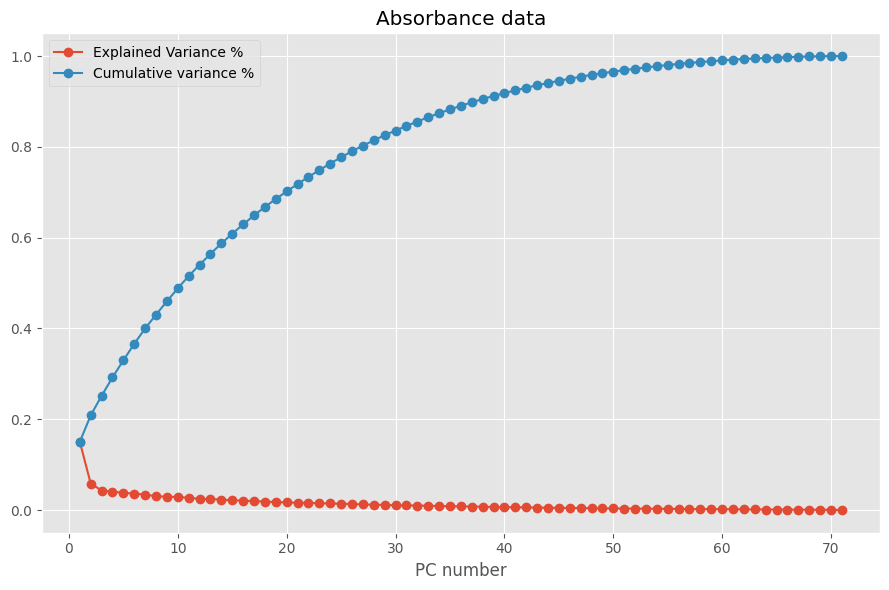

In [371]:
from sklearn.decomposition import PCA

n_components = 71

# Apply PCA
# 25 account for ~78% of the variance
pca = PCA(n_components)
principalComponents = pca.fit(df_imputed)

expl_var = principalComponents.explained_variance_ratio_
 
# Plot data
pc_array = np.linspace(1,n_components,n_components)
with plt.style.context(('ggplot')):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9,6))
    fig.set_tight_layout(True)
 
    ax.plot(pc_array, expl_var,'-o', label="Explained Variance %")
    ax.plot(pc_array, np.cumsum(expl_var),'-o', label = 'Cumulative variance %')
    ax.set_xlabel("PC number")
    ax.set_title('Absorbance data')
 
    plt.legend()
    plt.show()

### Principal component analysis (PCA)

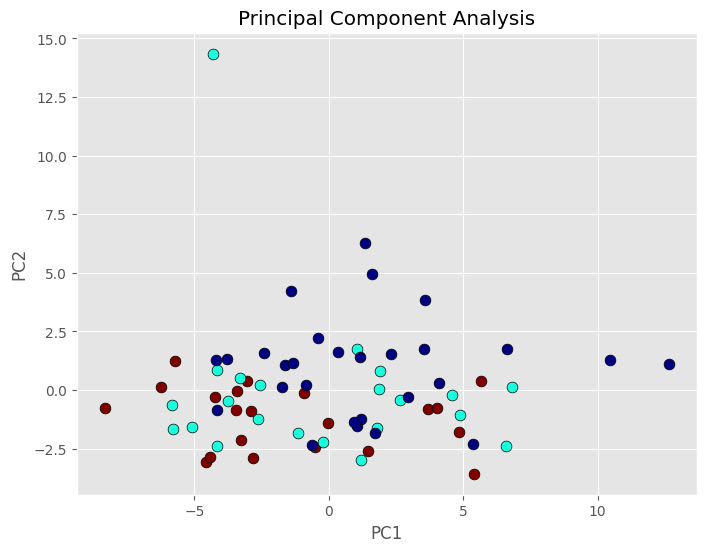

In [372]:
pca = PCA(n_components=25)
 
# Transform on the scaled features
principalComponents = pca.fit_transform(df_imputed)

# Define the labels for the plot legend
#labplot = []
lab = df.values[:,1] 

# Scatter plot for two principal components
unique = list(set(lab))
colors = [plt.cm.jet(float(i)/max(unique)) for i in unique]
with plt.style.context(('ggplot')):
    plt.figure(figsize=(8,6))
    for i, u in enumerate(unique):
        col = np.expand_dims(np.array(colors[i]), axis=0)
        xi = [principalComponents[j,0] for j in range(len(principalComponents[:,0])) if lab[j] == u]
        yi = [principalComponents[j,1] for j in range(len(principalComponents[:,1])) if lab[j] == u]
        plt.scatter(xi, yi, c=col, s=60, edgecolors='k',label=str(u))
 
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    #plt.legend(labplot,loc='upper right')
    plt.title('Principal Component Analysis')
    plt.show()

## Inspecting Individual Correlations
Example:

Influence of wording in SoCQ1P vs SoCQ1N --> does SoCQ1N positively correlate with CompN, does SoCQ1P positively correlate with CompP

Remarks:
Kinda unsafe for now, requires questions df for questions so we do not have to depend on the ordering.

In [373]:
from scipy.stats import pearsonr
import re

# put some substring of the respective variables, e.g. codes
substring1 = "SoCQ1P"
substring2 = "SoCQ1N"

'''
col list included thigs like "SoCQ1N[SQ004]. Choose the tendency best describing
your current experience.  Here and now, ... [I have the feeling others treated me unfairly.]" before
'''

var1 = list(filter(lambda a: substring1 in a, col_list))
var2 = list(filter(lambda a: substring2 in a, col_list))

if len(var1)>1:
    print(f"Found multiple matches for {substring1}, first was selected:")
    print(*list(var1), sep="\n")
    print()
    
if len(var2)>1:
    print(f"Found multiple matches for {substring2}, first was selected:")
    print(*list(var2), sep="\n")
    print()

var1, var2 = var1[0], var2[0]

Found multiple matches for SoCQ1P, first was selected:
SoCQ1P[SQ001]. Choose the tendency best describing your current experience.  Here and now, ... [I have the feeling I really care about what is happening around me.]
SoCQ1P[SQ002]. Choose the tendency best describing your current experience.  Here and now, ... [I feel contented by someone I countedd on.]
SoCQ1P[SQ003]. Choose the tendency best describing your current experience.  Here and now, ... [I feel positively surprized by someone I thought I knew well.]
SoCQ1P[SQ004]. Choose the tendency best describing your current experience.  Here and now, ... [I have the feeling others treated me fairly.]
SoCQ1P[SQ005]. Choose the tendency best describing your current experience.  Here and now, ... [I have the feeling I am in an unfamiliar situation and know what to do.]
SoCQ1P[SQ006]. Choose the tendency best describing your current experience.  Here and now, ... [I experience emotions I can accept to feel.]
SoCQ1P[SQ007]. Choose the ten

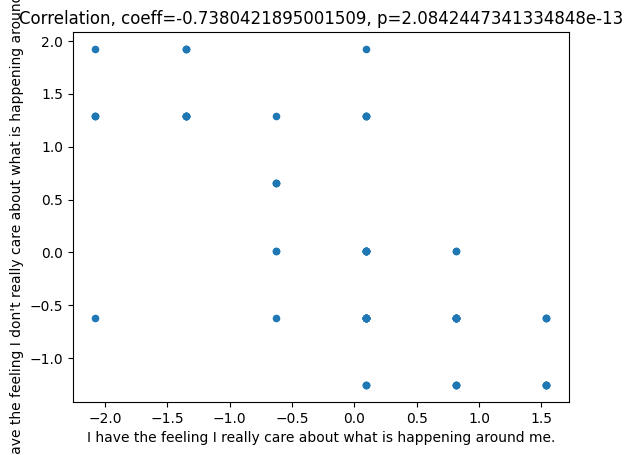

In [374]:
#warning: many points lie on top of each other.... colorcoding? artificial "noise"?
#todo: indexing df for questions instead, fix axis ranges after discussing nans
index1=list(col_list).index(var1)
index2=list(col_list).index(var2)

pearson, p = pearsonr(df_imputed[index1], df_imputed[index2])
ax = df.plot.scatter(index1, index2)
plt.title(f"Correlation, coeff={pearson}, p={p}")
ax.set_xlabel(re.findall(r"\[([\w\.\s]*)\]", list(col_list)[index1])[-1])
ax.set_ylabel(re.findall(r"\[([\w\.\s']*)\]", list(col_list)[index2])[-1])
plt.show()

## Grouping
Idea: look how variables behave in different groups, e.g. emergent clusters in PC-space or simply how another question was answered.

In [375]:
criterion = "SoCQ1P"
variable = "SoCQ1N"

var1 = list(filter(lambda a: criterion in a, col_list))
var2 = list(filter(lambda a: variable in a, col_list))

if len(var1)>1:
    print(f"Found multiple matches for {criterion}, first was selected:")
    print(*list(var1), sep="\n")
    print()
    
if len(var2)>1:
    print(f"Found multiple matches for {variable}, first was selected:")
    print(*list(var2), sep="\n")
    print()

var1, var2 = var1[0], var2[0]

Found multiple matches for SoCQ1P, first was selected:
SoCQ1P[SQ001]. Choose the tendency best describing your current experience.  Here and now, ... [I have the feeling I really care about what is happening around me.]
SoCQ1P[SQ002]. Choose the tendency best describing your current experience.  Here and now, ... [I feel contented by someone I countedd on.]
SoCQ1P[SQ003]. Choose the tendency best describing your current experience.  Here and now, ... [I feel positively surprized by someone I thought I knew well.]
SoCQ1P[SQ004]. Choose the tendency best describing your current experience.  Here and now, ... [I have the feeling others treated me fairly.]
SoCQ1P[SQ005]. Choose the tendency best describing your current experience.  Here and now, ... [I have the feeling I am in an unfamiliar situation and know what to do.]
SoCQ1P[SQ006]. Choose the tendency best describing your current experience.  Here and now, ... [I experience emotions I can accept to feel.]
SoCQ1P[SQ007]. Choose the ten

<Axes: xlabel='39'>

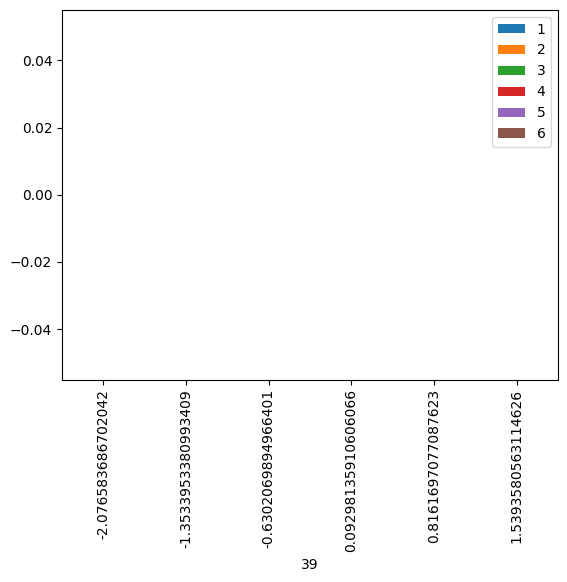

In [376]:
index1=list(col_list).index(var1)
index2=list(col_list).index(var2)

df2=df[[index1, index2]].copy()
for i in range(1,7):
    func = lambda x: 1 if x==i else 0
    df2[i]=df2[index2].apply(func)
df2 = df2.groupby(index1).sum()
df2 = df2.drop(columns=29)
df2.plot.bar()